<a href="https://colab.research.google.com/github/cyamize/MNIST/blob/main/mnist_cnn_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np

In [13]:
import tensorflow as tf

In [6]:
img_rows, img_cols = 28, 28

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

In [9]:
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [10]:
input_shape = (img_rows, img_cols, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'test sample')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train sample
10000 test sample


In [14]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [15]:
model=load_model('mnist_cnn.h5')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

<function matplotlib.pyplot.show>

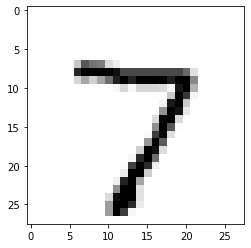

In [18]:
n=0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show

In [20]:
print('the answer is:', np.argmax(model.predict(x_test[n].reshape((1,28,28,1))), axis=-1))

the answer is: [7]


In [22]:
model.predict(x_test[n].reshape(1,28,28,1))

array([[5.7116773e-13, 4.2996904e-09, 1.8998081e-10, 1.1474849e-09,
        8.2467685e-11, 3.0885562e-13, 1.0050317e-17, 1.0000000e+00,
        3.8024124e-12, 2.6997973e-09]], dtype=float32)

In [23]:
model.predict(x_test)

array([[5.7116882e-13, 4.2996988e-09, 1.8998153e-10, ..., 1.0000000e+00,
        3.8024198e-12, 2.6998024e-09],
       [1.3259117e-12, 9.7189456e-10, 1.0000000e+00, ..., 4.7941578e-15,
        2.3076712e-15, 1.0515350e-15],
       [9.9358377e-10, 9.9999917e-01, 6.0538694e-09, ..., 5.3268263e-07,
        1.2572336e-07, 2.8198410e-09],
       ...,
       [9.2764980e-18, 2.2718751e-09, 1.2142090e-13, ..., 4.3697542e-11,
        4.1227296e-11, 4.2163824e-09],
       [9.2800159e-15, 2.7496343e-13, 2.9163419e-18, ..., 6.6806780e-15,
        1.2105918e-10, 6.3845827e-14],
       [1.5485337e-09, 3.7897761e-13, 1.6479521e-10, ..., 1.8497769e-18,
        2.6468300e-10, 1.3231713e-11]], dtype=float32)

In [24]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

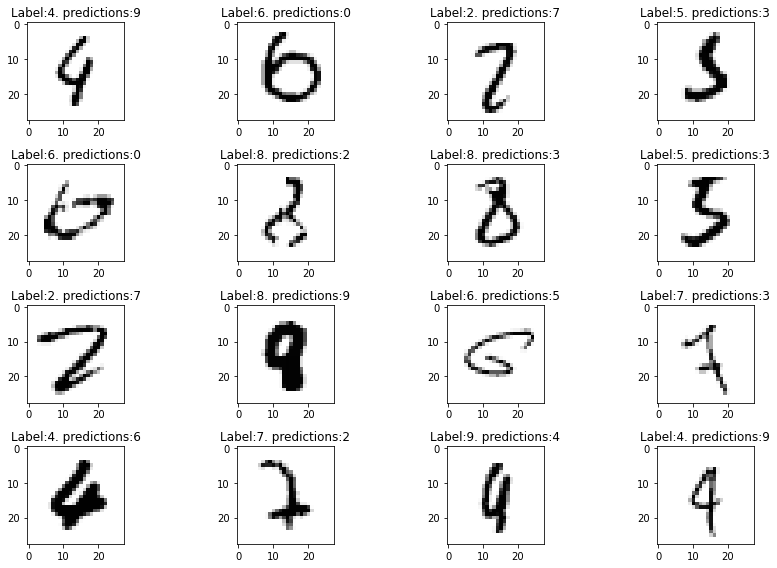

In [28]:
wrong_result = [ ]

for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)

count = 0
nrows = 4
ncols = 4

plt.figure(figsize=(12,8))

for n in wrong_result:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  tmp = 'Label:' + str(test_labels[n]) + ". predictions:" + str(predicted_labels[n])
  plt.title(tmp)

  if count == 16:
    break

plt.tight_layout()
plt.show()